In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('Height-Weight Data.csv')


In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df.shape

(3501, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [9]:
import os ###path indicator
os.getcwd()

'C:\\Users\\User\\Music'

In [10]:
df.Height


0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [15]:
df.Weight

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

Text(0, 0.5, 'Weight')

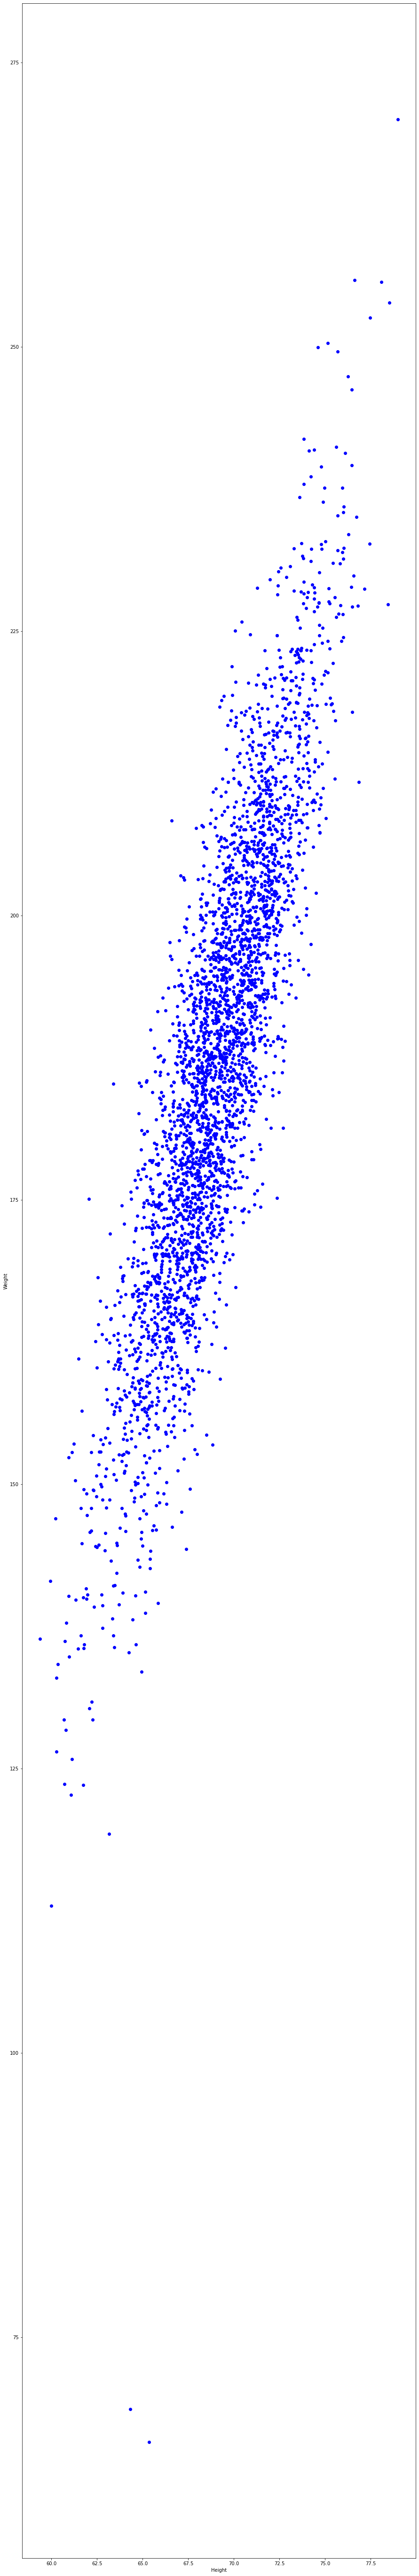

In [16]:
plt.figure(figsize=(15,100))
plt.scatter(df.Height,df.Weight,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

In [17]:
x=df[['Height']]
x.head()


,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [18]:
y=df.Weight
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

Text(0, 0.5, 'Weight')

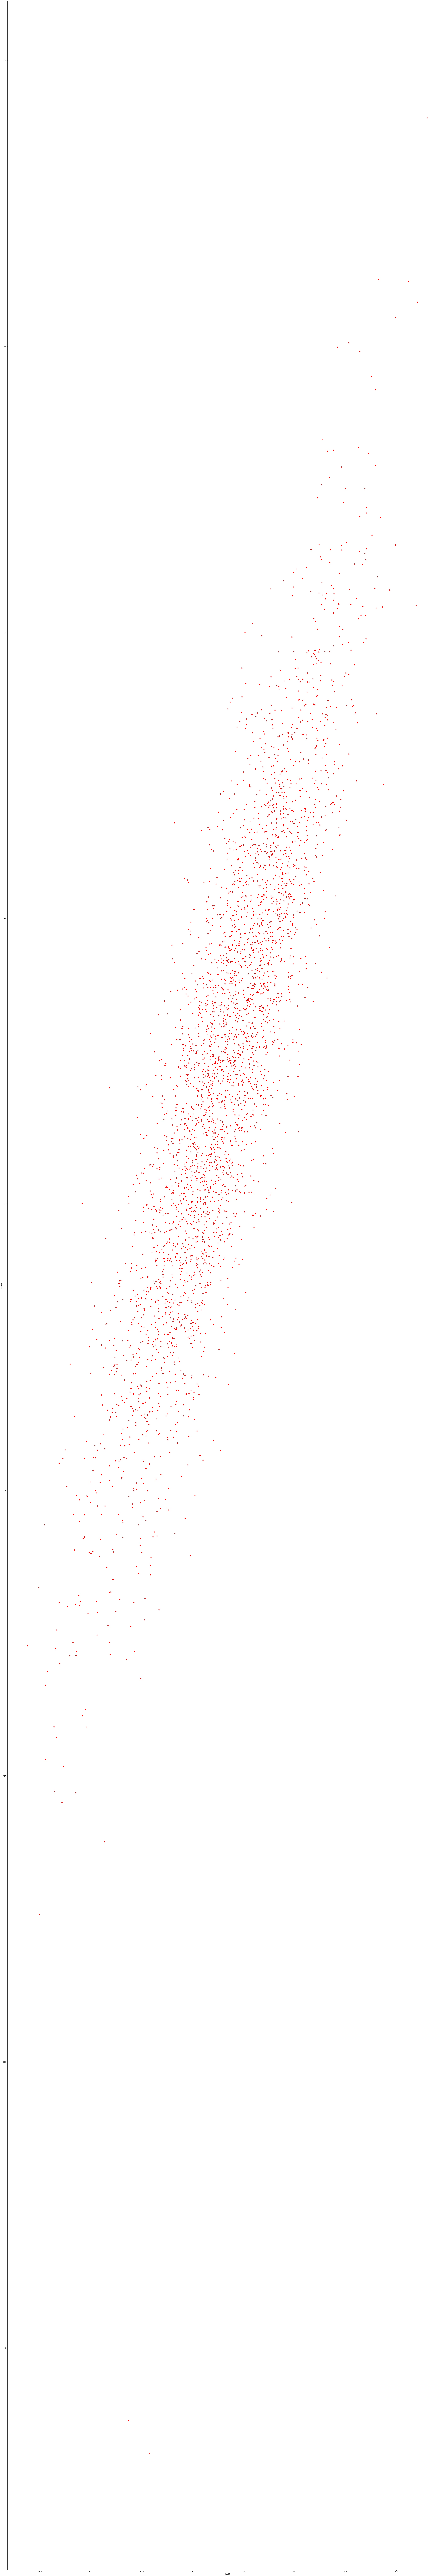

In [19]:
plt.figure(figsize=(50,300))
plt.scatter(x,y,color='red')
plt.xlabel('Height')
plt.ylabel('Weight')

# validate Training and Testing Data

In [ ]:
# from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)
xtrain.head()

In [23]:
ytrain.head()

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

In [24]:
xtest.shape

(1051, 1)

In [25]:
xtrain.shape

(2450, 1)

# Linear Regression model tranining with using Train data

In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [27]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [28]:
m=reg.coef_
m

array([5.97744946])

In [29]:
c=reg.intercept_
c

-225.82603000755844

# Y = MX + C

In [30]:
y=(71.730978*m)+c
y

array([202.94226582])

In [31]:
y=(74.110105*m)+c
y

array([217.16337723])

In [32]:
reg.predict([[69.881796]])

array([191.88887387])

In [33]:
x.mean()

Height    69.024411
dtype: float64

In [34]:
y.mean()

217.16337722971454

In [35]:
reg.predict(xtest)

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [36]:
xtest


,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


In [37]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202829
Name: Weight, Length: 1051, dtype: float64

In [38]:
reg.predict(x)

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

In [40]:
df['Predicted Weight']=reg.predict(x)

Text(0, 0.5, 'Weight')

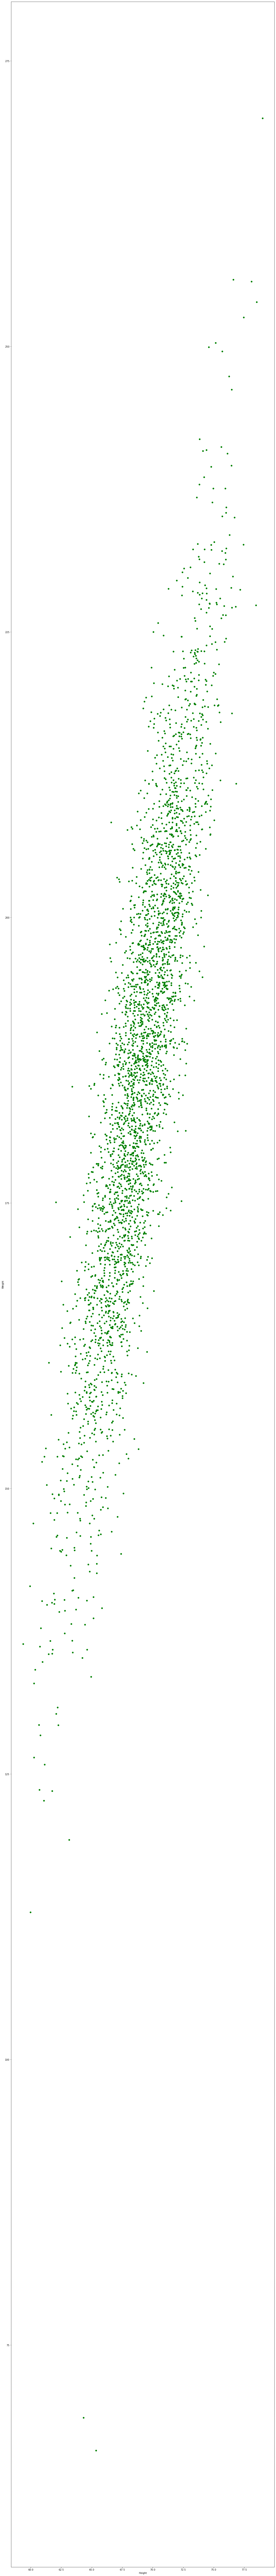

In [41]:
plt.figure(figsize=(20,200))
plt.scatter(df.Height,df.Weight,color='green')
plt.xlabel('Height')
plt.ylabel('Weight')

# BEST FIT LINE 

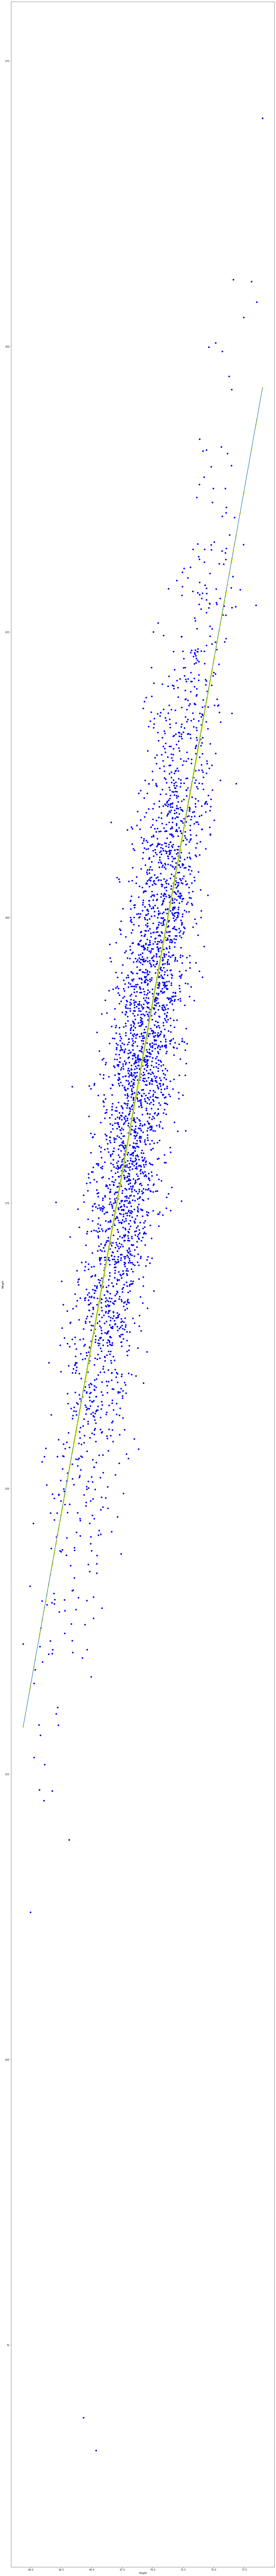

In [42]:
plt.figure(figsize=(20,200))
plt.scatter(df.Height,df.Weight,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(df.Height,df['Predicted Weight'])
plt.scatter(df.Height,df['Predicted Weight'],color='yellow')

# CHECKING ACCURACY OF TEST 

In [43]:
reg.score(xtest,ytest)

0.7313258168853622

In [44]:
pred_y=reg.predict(xtest)
pred_y

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

# MSE ERROR

In [45]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred_y)
mse

110.89221516932378

In [46]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred_y)
mae

8.279688660993672